In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import millify as mil
import warnings
warnings.filterwarnings("ignore")
# from numerize import numerize as num
# house_type_sales["total amount"]= house_type_sales["total amount"].apply(num.numerize) to numerize the number

In [2]:
data = pd.read_parquet("DKHousingPrices.parquet")

In [3]:
data = data[data.year_build >=1970].reset_index(drop=True)

In [4]:
data

date quarter  house_id   house_type    sales_type  year_build  \
0      2024-10-26  2024Q4         0        Villa  regular_sale        1974   
1      2024-10-24  2024Q4        14        Villa  regular_sale        1979   
2      2024-10-24  2024Q4        23        Villa  regular_sale        2014   
3      2024-10-24  2024Q4        22  Summerhouse  regular_sale        1979   
4      2024-10-24  2024Q4        20  Summerhouse  regular_sale        1979   
...           ...     ...       ...          ...           ...         ...   
643098 1992-01-05  1992Q1   1505874    Apartment  regular_sale        1986   
643099 1992-01-05  1992Q1   1505862        Villa  regular_sale        1970   
643100 1992-01-05  1992Q1   1505861        Villa  regular_sale        1972   
643101 1992-01-05  1992Q1   1505858        Villa   family_sale        1972   
643102 1992-01-05  1992Q1   1505875        Villa  regular_sale        1989   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0              4350000                                  0.0         5  215.0   
1              3000000                                  0.0         6  208.0   
2              4535000                                 -3.0         6  189.0   
3              1100000                                 -8.0         3   70.0   
4              1070000                                 -2.0         4   76.0   
...                ...                                  ...       ...    ...   
643098          426692                                  0.0         2   61.0   
643099          975000                                  0.0         7  186.0   
643100         1004000                                  0.0         6  156.0   
643101          750000                                  0.0         4  160.0   
643102         1156150                                  0.0         6  157.0   

           sqm_price               address  zip_code        city  \
0       20232.558594         Kildevangen 5      8382    Hinnerup   
1       14423.077148           Vesterled 7      8300       Odder   
2       23994.708984           Mosevang 10      7300     Jelling   
3       15714.286133      Rønnebærvænget 3      6094       Hejls   
4       14078.947266         Olymposvej 23      4200    Slagelse   
...              ...                   ...       ...         ...   
643098   6994.950684      Grønnegården 418      2670       Greve   
643099   5241.935547     Margrethe Alle 44      2690  Karlslunde   
643100   6435.897461         Tornekrogen 9      3500     Værløse   
643101   4687.500000  P O Pedersens Vej 40      7500   Holstebro   
643102   7364.012695           Ãgirsvej 3      3650    Alstykke   

                       area   region  nom_interest_rate%  dk_ann_infl_rate%  \
0        East & mid jutland  Jutland                 3.1                NaN   
1        East & mid jutland  Jutland                 3.1                NaN   
2             South jutland  Jutland                 3.1                NaN   
3             South jutland  Jutland                 3.1                NaN   
4             Other islands  Zealand                 3.1                NaN   
...                     ...      ...                 ...                ...   
643098  Capital, Copenhagen  Zealand                 9.5                2.1   
643099  Capital, Copenhagen  Zealand                 9.5                2.1   
643100        North Zealand  Zealand                 9.5                2.1   
643101        South jutland  Jutland                 9.5                2.1   
643102        North Zealand  Zealand                 9.5                2.1   

        yield_on_mortgage_credit_bonds%  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
...                                 ...  
643098                            10.14  
643099       

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643102 non-null  float32       
 

In [7]:
data[data["sqm"].isna()]

date quarter  house_id   house_type    sales_type  year_build  \
488620 2006-08-21  2006Q3   1082137  Summerhouse  regular_sale        1971   

        purchase_price  %_change_between_offer_and_purchase  no_rooms  sqm  \
488620          995000                                  0.0         2  NaN   

        sqm_price        address  zip_code    city           area   region  \
488620        NaN  Fjordengen 12      4300  Holbæk  Other islands  Zealand   

        nom_interest_rate%  dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  
488620                2.75               1.92                             5.14

In [8]:
# #set a query for villas on the same area, same purchase_price range and same room num to get the mis vals
# zealand_villa = data[(data["region"]== "Zealand") & (data["house_type"]=="Villa") & ( data["purchase_price"] < 2000000) & (data["purchase_price"] > 1900000 ) & (data["no_rooms"] == 2)]
# zealand_villa[["sqm" , "sqm_price"]].describe().round(3)
# so i will fillna with median value for sqm 85.000 and sqm_price 23077.189

In [9]:
#set a query for Summerhouse on the same area, same purchase_price range and same room num to get the mis vals
zealand_villa = data[(data["region"]== "Zealand") & (data["house_type"]=="Summerhouse") & ( data["purchase_price"] < 1000000) & (data["purchase_price"] > 990000 ) & (data["zip_code"] ==4300) & (data["no_rooms"] == 2)]
zealand_villa[["sqm" , "sqm_price"]].describe().round(3)
# so i will fillna with mean value for sqm 44.000 and sqm_price 23361.641

sqm  sqm_price
count   2.000      2.000
mean   44.000  23361.641
std    11.314   5977.917
min    36.000  19134.615
25%    40.000  21248.129
50%    44.000  23361.641
75%    48.000  25475.152
max    52.000  27588.666

In [10]:
# data.loc[212845,["sqm" , "sqm_price"]] = 85 , 23077.189
data.loc[488620,["sqm" , "sqm_price"]] = 44.000 , 23361.641

In [11]:
data.iloc[488620]

date                                   2006-08-21 00:00:00
quarter                                             2006Q3
house_id                                           1082137
house_type                                     Summerhouse
sales_type                                    regular_sale
year_build                                            1971
purchase_price                                      995000
%_change_between_offer_and_purchase                    0.0
no_rooms                                                 2
sqm                                                   44.0
sqm_price                                        23361.641
address                                      Fjordengen 12
zip_code                                              4300
city                                                Holbæk
area                                         Other islands
region                                             Zealand
nom_interest_rate%                                    2.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643103 non-null  float32       
 

In [13]:
# remove dk_ann_infl_rate% & yield_on_mortgage_credit_bonds% columns from data
data.drop( columns= ["dk_ann_infl_rate%","yield_on_mortgage_credit_bonds%"], inplace=True )

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 643103 non-null  datetime64[ns]
 1   quarter                              643103 non-null  period[Q-DEC] 
 2   house_id                             643103 non-null  int64         
 3   house_type                           643103 non-null  category      
 4   sales_type                           643103 non-null  category      
 5   year_build                           643103 non-null  int16         
 6   purchase_price                       643103 non-null  int32         
 7   %_change_between_offer_and_purchase  643103 non-null  float32       
 8   no_rooms                             643103 non-null  int8          
 9   sqm                                  643103 non-null  float32       
 

In [15]:
data.sample(8)

date quarter  house_id   house_type    sales_type  year_build  \
282828 2018-01-17  2018Q1    602776  Summerhouse  regular_sale        1970   
520674 2004-12-27  2004Q4   1159372        Villa  regular_sale        1979   
331641 2015-10-13  2015Q4    712006        Villa  regular_sale        1979   
642620 1992-02-02  1992Q1   1504429         Farm  regular_sale        1978   
65677  2022-11-24  2022Q4    137614        Villa  regular_sale        1978   
322710 2016-02-29  2016Q1    689634    Townhouse  regular_sale        1979   
457814 2008-05-22  2008Q2   1005297    Townhouse  regular_sale        1984   
111230 2021-09-22  2021Q3    243094    Townhouse  regular_sale        2014   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
282828         1050000                                -12.0         2   48.0   
520674         1751999                                  0.0         4  123.0   
331641         3800000                                 -1.0         4  130.0   
642620         4000000                                  0.0         7  269.0   
65677          3675000                                 -8.0         6  167.0   
322710          925000                                  0.0         3   76.0   
457814         1285000                                  0.0         2   59.0   
111230         3895000                                  0.0         3  109.0   

           sqm_price            address  zip_code           city  \
282828  21875.000000        Firhøjvej 9      3120  Dronningmølle   
520674  14243.894531   Bavnegårdsvej 61      8361     Hasselager   
331641  29230.769531      Randvolden 34      2730         Herlev   
642620  14869.888672    Holmgårdsvej 50      9230    Svenstrup J   
65677   22005.988281    Fyrresvinget 19      8600      Silkeborg   
322710  12171.052734  Grævlingevænget 1      5800         Nyborg   
457814  21779.660156     Liselejevej 1A      3360       Liseleje   
111230  35733.945312    AllÃ©kredsen 36      3400       Hillerød   

                       area         region  nom_interest_rate%  
282828        North Zealand        Zealand                0.00  
520674   East & mid jutland        Jutland                2.00  
331641  Capital, Copenhagen        Zealand                0.00  
642620        North jutland        Jutland                9.50  
65677    East & mid jutland        Jutland                0.65  
322710        Fyn & islands  Fyn & islands                0.00  
457814        North Zealand        Zealand                4.00  
111230        North Zealand        Zealand                0.00

In [95]:
# Add a new column for house age
data["house_age"] = data["date"].dt.year-data["year_build"]
data.sample(10)

date quarter  house_id   house_type    sales_type  year_build  \
436858 2010-01-12  2010Q1    953709        Villa  regular_sale        1976   
92775  2022-02-22  2022Q1    202012        Villa  regular_sale        2023   
336246 2015-08-13  2015Q3    722280        Villa  regular_sale        1975   
147882 2021-02-15  2021Q1    318654    Townhouse  regular_sale        2014   
261990 2018-08-07  2018Q3    558708        Villa  regular_sale        1971   
261322 2018-08-14  2018Q3    557260  Summerhouse  regular_sale        1979   
622826 1995-04-02  1995Q2   1442534  Summerhouse  regular_sale        1987   
60917  2023-02-01  2023Q1    126258    Townhouse  regular_sale        2005   
174780 2020-08-31  2020Q3    375919    Apartment  regular_sale        2020   
301839 2016-11-16  2016Q4    643805        Villa  regular_sale        1974   

        purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
436858         2200000                                 -4.0         4  124.0   
92775          1556509                                  4.0         6  200.0   
336246         1560000                                 -2.0         5  133.0   
147882         8195000                                  0.0         5  152.0   
261990         3200000                                 -3.0         6  152.0   
261322         1095000                                  0.0         4   84.0   
622826          850000                                  0.0         3   80.0   
60917          3500000                                 -5.0         4  113.0   
174780         5449000                                  0.0         4  131.0   
301839         3250000                                 -4.0         3  145.0   

           sqm_price                          address  zip_code  \
436858  17741.935547                      Planetvej 4      4040   
92775    7782.544922                      Vendehøj 84      8543   
336246  11729.323242            Knud Rasmussens Vej 7      6715   
147882  53914.472656  Hilmar Baunsgaards Boulevard 23      2300   
261990  21052.630859                   Rosenhaven 208      2980   
261322  13035.713867                       Knudsvej 8      4281   
622826  10625.000000                Hestetangsvej 170      3520   
60917   30973.451172                Brødregårdsvej 39      2980   
174780  41595.417969         Troldmands AllÃ© 8, 3. b      2680   
301839  22413.792969                    Tibberuphøj 4      3060   

                 city                 area   region  nom_interest_rate%  \
436858       Jyllinge        Other islands  Zealand                1.00   
92775        Hornslet   East & mid jutland  Jutland                0.00   
336246      Esbjerg N        South jutland  Jutland                0.00   
147882    København S  Capital, Copenhagen  Zealand                0.00   
261990       Kokkedal  Capital, Copenhagen  Zealand                0.00   
261322         Gørlev        Other islands  Zealand                0.00   
622826          Farum        North Zealand  Zealand                6.00   
60917        Kokkedal  Capital, Copenhagen  Zealand                1.75   
174780  Solrød Strand  Capital, Copenhagen  Zealand                0.00   
301839     Espergærde        North Zealand  Zealand                0.00   

        house_age  
436858         34  
92775          -1  
336246         40  
147882          7  
261990         47  
261322         39  
622826          8  
60917          18  
174780          0  
301839         42

In [17]:
data.sales_type.unique()

['regular_sale', 'other_sale', 'family_sale', 'auction', '-']
Categories (5, object): ['-', 'auction', 'family_sale', 'other_sale', 'regular_sale']

## New df cols will be: 
<div>
<table style="height: 36px;" width="548">
<tbody>
<tr>
<td style="width: 49.4929px;">
<table class="dataframe" style="height: 27px;" border="1" width="1014">
<thead>
<tr>
<th style="width: 35.7783px;">house_id</th>
<th style="width: 73.5731px;">date</th>
<th style="width: 51.7689px;">region</th>
<th style="width: 29.316px;">city</th>
<th style="width: 94.092px;">house_type</th>
<th style="width: 85.9906px;">year_build</th>
<th style="width: 80.908px;">no_rooms</th>
<th style="width: 33.8326px;">sqm</th>
<th style="width: 84.0802px;">sqm_price</th>
<th style="width: 87.7948px;">house_age</th>
<th style="width: 124.045px;">purchase_price</th>
<th style="width: 169.8px;">nom_interest_rate%</th>
</tr>

In [18]:
df = data[["house_id","date","region", "city", "house_type", "year_build", "no_rooms", "sqm" , "sqm_price", "house_age", "purchase_price","nom_interest_rate%"]]

In [19]:
df.sample(5)

house_id       date         region        city house_type  year_build  \
417077    908066 2011-03-14        Jutland  Ringkøbing  Apartment        1992   
535418   1195356 2004-01-14        Jutland      Børkop      Villa        1979   
66511     139800 2022-11-13        Zealand    Nordhavn  Apartment        2023   
119381    260940 2021-07-19        Jutland  Randers NA      Villa        2008   
31982      57881 2023-11-16  Fyn & islands       Aarup      Villa        1975   

        no_rooms    sqm     sqm_price  house_age  purchase_price  \
417077         2   48.0  13958.333008         19          670000   
535418         4  100.0   9320.000000         25          932000   
66511          3   92.0  71728.257812         -1         6599000   
119381         6  156.0  21794.871094         13         3400000   
31982          7  122.0  11475.410156         48         1400000   

        nom_interest_rate%  
417077                0.75  
535418                2.00  
66511                 0.65  
119381                0.00  
31982                 3.60

## issue
#### There are some values on "house_age" column with negative values

In [20]:
df["house_age"][df["house_age"]<0]


28524     -1
28741     -1
28752     -1
30997     -1
31298     -1
          ..
643059   -29
643062    -6
643064   -13
643065   -30
643067   -30
Name: house_age, Length: 96050, dtype: int32

In [21]:
df["house_age"][df["house_age"]<0] = 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   house_id            643103 non-null  int64         
 1   date                643103 non-null  datetime64[ns]
 2   region              643103 non-null  category      
 3   city                643103 non-null  object        
 4   house_type          643103 non-null  category      
 5   year_build          643103 non-null  int16         
 6   no_rooms            643103 non-null  int8          
 7   sqm                 643103 non-null  float32       
 8   sqm_price           643103 non-null  float64       
 9   house_age           643103 non-null  int32         
 10  purchase_price      643103 non-null  int32         
 11  nom_interest_rate%  643103 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(2), float64(1), int16(1), int32(2), int64(1

<hr />
<h3 style="text-align: center;"><strong>Firstly we need to know what is the house types distribution in each region ?</strong></h3>

In [23]:
# How many house types ??
px.pie(df["house_type"].value_counts(), names= df["house_type"].value_counts().index,values=df["house_type"].value_counts().values, title= "Sold House Types Count ").update_layout(title_x=(0.5))

In [24]:
Regions_sales = df.groupby(["region"])["purchase_price"].agg(["sum", "count"]).sort_values(by="sum" , ascending=False).reset_index()
display(px.bar( Regions_sales , x="region" ,y="sum",text_auto=True , title=("Region Sales Amount") ).update_layout(title_x=0.5))
display(px.bar( Regions_sales , x="region" ,y="count",text_auto=True , title=("Region Sales count") ).update_layout(title_x=0.5))

<div>
<h1>&diams;First Note:</h1>
</div>
<h3>&bull; Jutland ranking as the 1st region by sales count (346 K) and sales amount (580 B), followed by Zealand region with sales count (244 K) and sales amount (572 B).</h3>


In [25]:
#count and sales amount of sold property types by region:
region_house_types_count= df.groupby(["region" , "house_type"])[ "purchase_price"].agg(["count" , "sum"]).sort_values(by="sum", ascending= False).reset_index()
display(px.bar(region_house_types_count, x= "region", y="count" ,color="house_type",text_auto= True, title=("Sold House types Count in each region")).update_layout(title_x=0.5))
display(px.bar(region_house_types_count, x= "region", y="sum" ,color="house_type",text_auto= True,title=("House types total amount in each region")).update_layout(title_x=0.5))

## > What are the Top cites by Sales value and number of sold properties ?

In [26]:
# Number of cities that we have sold in, by region
px.pie(df.groupby("region")["city"].count(),names=df.groupby("region")["city"].count().index,values=df.groupby("region")["city"].count().values, title= "Number of cities by Regions").update_layout(title_x = 0.5)

### * so the Jutland region comes as the first region by cities number, followed by Zealand.

<h3 style="text-align: center;"><strong>Top 20 cities sales amount disterpution</strong></h3>

In [27]:
area_city_sales = df.groupby(["region" ,"city"])["purchase_price"].agg(["count" , "sum"]).sort_values(by="sum",ascending=False).reset_index().head(21).rename(columns={"count" : "prop sold count" , "sum" : "sales amount"})
area_city_sales

region           city  prop sold count  sales amount
0   Zealand    København S             8540   34361256719
1   Jutland      Silkeborg             8680   20579612995
2   Zealand       Roskilde             6700   18935563753
3   Jutland       Aarhus C             4446   16817343677
4   Jutland        Horsens             8654   16503987725
5   Jutland        Kolding             6242   12581055240
6   Jutland        Herning             7030   12106789815
7   Zealand          Greve             4500   11890760811
8   Jutland          Vejle             5701   11843783871
9   Zealand    København V             2307   11361649468
10  Jutland         Viborg             6037   11250430724
11  Zealand       Hillerød             4371   11246786942
12  Zealand   København SV             2291   10306596277
13  Jutland      Holstebro             6482   10130000609
14  Zealand  Solrød Strand             3373   10051883290
15  Zealand           Køge             3850    9818137002
16  Jutland        Risskov             3016    9703397704
17  Zealand        Værløse             2669    9651105851
18  Jutland    Skanderborg             4033    9324324129
19  Zealand        Allerød             3093    9290111326
20  Zealand         Holbæk             4482    9212432394

In [28]:
display(px.bar(area_city_sales , x ="city" , y = "sales amount",text_auto=True , title= "Top 20 cities by sales amount").update_layout(title_x = 0.5))
display(px.bar(area_city_sales , x ="region" , y = "sales amount" , color= "city", barmode="group",text_auto=True , title="Top 20 Cities sales amount by Region").update_layout(title_x = 0.5))

#### 1- As we can see, Top 20 city by total sales amount are located on Zealand and Jutland regions only.
#### 2- Zealand region ranks 1st in terms by  the number of cities with larger shares of top 20 cities total purchase amount by (11cities) followed by Jutland region comes on the 2nd stage by(9 cites).
#### 3- Kobenhavn City is our Star City by around 34 Billion for sales amount.


In [29]:
display(px.bar(area_city_sales , x ="region" , y = "sales amount",text_auto=True,color="city" , title= "Regions of top 20 cities by sales amount").update_layout(title_x = 0.5))
display(px.bar(area_city_sales , x ="region" , y = "prop sold count" ,color="city",text_auto=True, title=" Regions of top 20 cities by sold properties count").update_layout(title_x = 0.5))

#### So, Zealand which has fewer city than Jutland, ranks 1st region by the larger share of top 20 cities total sales amount (9.21 B).

***

## > What is the distripution of house_types by sales amount and count ?

In [30]:
# How many types of sold unites ??
px.pie(df["house_type"].value_counts(), names= df["house_type"].value_counts().index,values=df["house_type"].value_counts().values, title= "Types of sold Houses ").update_layout(title_x=(0.5))

In [31]:
# New table for houses type sales.
house_type_sales = (df.groupby("house_type")["purchase_price"].agg(["count", "sum"]).sort_values(by="sum",ascending=False).reset_index()).rename(columns={"count":"number" , "sum":"total amount"})
house_type_sales

house_type  number  total amount
0        Villa  340971  635595308743
1    Townhouse   99647  216328899880
2    Apartment   76949  207213649761
3  Summerhouse  114615  141712121393
4         Farm   10921   35269656047

In [32]:
display(px.bar(house_type_sales , x="house_type", y="total amount", text_auto=True, title="House_types Sales Amount").update_layout(title_x=0.5))
display(px.bar(house_type_sales , x="house_type", y="number", text_auto=True, title="House_types Sales Count").update_layout(title_x=0.5))

#### Villas ranks 1st stage by total sales amount and sold property count with around 636B Sales amount and 341K sold property counts, followed by Townhouses on Sales amount with around 216B but it's followed by Summerhouses on sold property counts with around 115K.

In [94]:
#the difrence between Townhouses and Summerhouses on total sales amount and sold properties count

display(print(f"The Townhouses and Summerhouses sold property count Ratio is{house_type_sales[house_type_sales["house_type"]=="Townhouse"]["number"].values / house_type_sales[house_type_sales["house_type"]=="Summerhouse"]["number"].values}"))
display(print(f"The Townhouses and Summerhouses Sales Amount Ratio is {house_type_sales[house_type_sales["house_type"]=="Townhouse"]["total amount"].values / house_type_sales[house_type_sales["house_type"]=="Summerhouse"]["total amount"].values}"))

The Townhouses and Summerhouses sold property count Ratio is[0.86940627]


None

The Townhouses and Summerhouses Sales Amount Ratio is [1.52653773]


None

#### The Townhouses  and Summerhouses sold property count Ratio is (.86) which is less than their Sales Ratio which's (1.5).


In [93]:
#the difrence between villas and apartments on total amount sales and sold property numbers

display(print(f"The villas and apartments sold property Count Ratio is{house_type_sales[house_type_sales["house_type"]=="Villa"]["number"].values / house_type_sales[house_type_sales["house_type"]=="Apartment"]["number"].values}"))
display(print(f"The villas and apartments Sales Amount Ratio is {house_type_sales[house_type_sales["house_type"]=="Villa"]["total amount"].values / house_type_sales[house_type_sales["house_type"]=="Apartment"]["total amount"].values}"))

The villas and apartments sold property Count Ratio is[4.43112971]


None

The villas and apartments Sales Amount Ratio is [3.06734286]


None

#### The villas and apartments sold property count Ratio is (4.4) which is bigger than their Sales Ratio (3.0).
*  This means, (the price of villas is cheaper compared to apartments) OR (the price of apartments is expensive compared to villa).

# what is the top factors affecting on the house types prices ??

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   house_id            643103 non-null  int64         
 1   date                643103 non-null  datetime64[ns]
 2   region              643103 non-null  category      
 3   city                643103 non-null  object        
 4   house_type          643103 non-null  category      
 5   year_build          643103 non-null  int16         
 6   no_rooms            643103 non-null  int8          
 7   sqm                 643103 non-null  float32       
 8   sqm_price           643103 non-null  float64       
 9   house_age           643103 non-null  int32         
 10  purchase_price      643103 non-null  int32         
 11  nom_interest_rate%  643103 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(2), float64(1), int16(1), int32(2), int64(1

In [36]:
 #creat a new table with (house_type, city, house_age, no_rooms, sqm, sqm_price, purchase_price)
house_types_pricing_factors =df[["house_type" , "region", "city", "house_age" , "no_rooms", "sqm","sqm_price", "purchase_price"]]
house_types_pricing_factors["house_type"].unique()

['Villa', 'Summerhouse', 'Apartment', 'Townhouse', 'Farm']
Categories (5, object): ['Apartment', 'Farm', 'Summerhouse', 'Townhouse', 'Villa']


<hr />
<div>
<div>
<h3>&bull; <strong><span style="text-decoration: underline;"><em>Issue</em></span>:</strong> There's some values on house_age column with negative value due to build date is after purchase date.</h3></div><h2 style="text-align: center;"><strong>Create a new df without negative values on house age column</strong></h2>
</div>

In [99]:
house_types_pricing_factors_age = house_types_pricing_factors[house_types_pricing_factors["house_age"] >= 0]
house_types_pricing_factors_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643103 entries, 0 to 643102
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   house_type      643103 non-null  category
 1   region          643103 non-null  category
 2   city            643103 non-null  object  
 3   house_age       643103 non-null  int32   
 4   no_rooms        643103 non-null  int8    
 5   sqm             643103 non-null  float32 
 6   sqm_price       643103 non-null  float64 
 7   purchase_price  643103 non-null  int32   
dtypes: category(2), float32(1), float64(1), int32(2), int8(1), object(1)
memory usage: 19.0+ MB


<hr />
<div>
<h2 style="text-align: center;"><strong>Create a new df for each house type value</strong></h2>
</div>

In [38]:
villa_df = house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Villa"]
apartment_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Apartment"]
summerhouse_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Summerhouse"]
townhouse_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Townhouse"]
farm_df=house_types_pricing_factors_age[house_types_pricing_factors_age["house_type"]=="Farm"]

 <h1 style="text-align: center;"><strong>Villas Data Disterpution</strong></h1> 

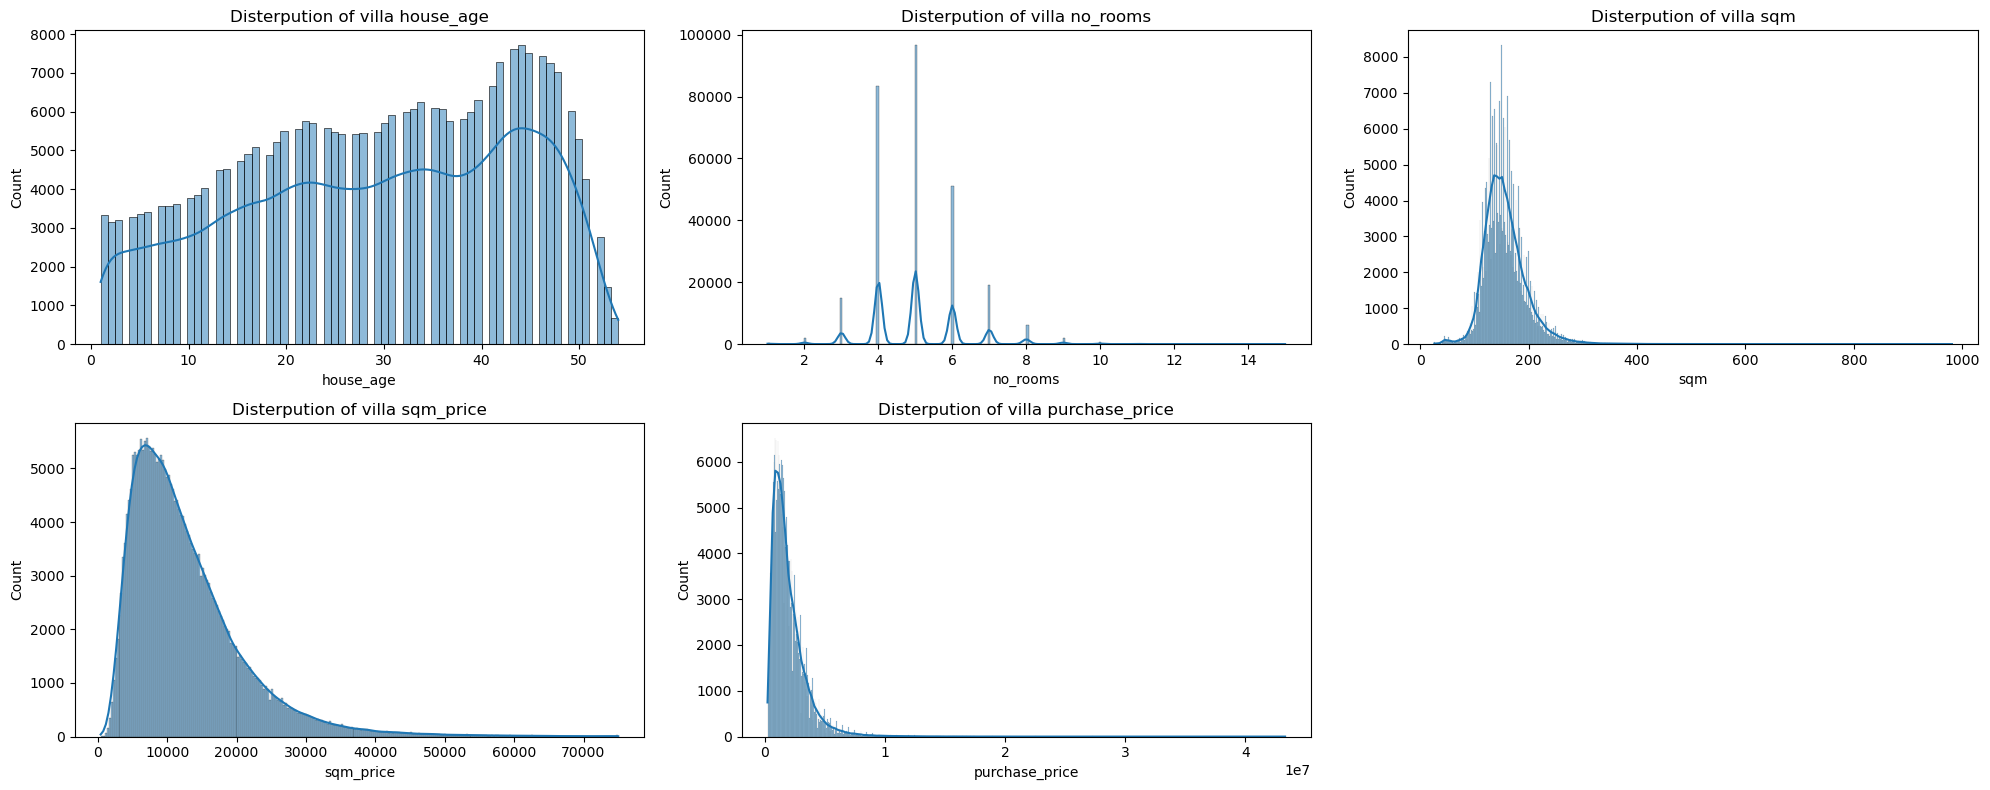

In [39]:
#Numerical data disterpution:
plt.figure(figsize=(20,8))
for e ,i in enumerate(villa_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of villa {i}")
    sns.histplot(villa_df[i], kde=True)
    plt.tight_layout();

### As we can see, the most of Villas sqm size disterpution is located between 100 to 200 meter.

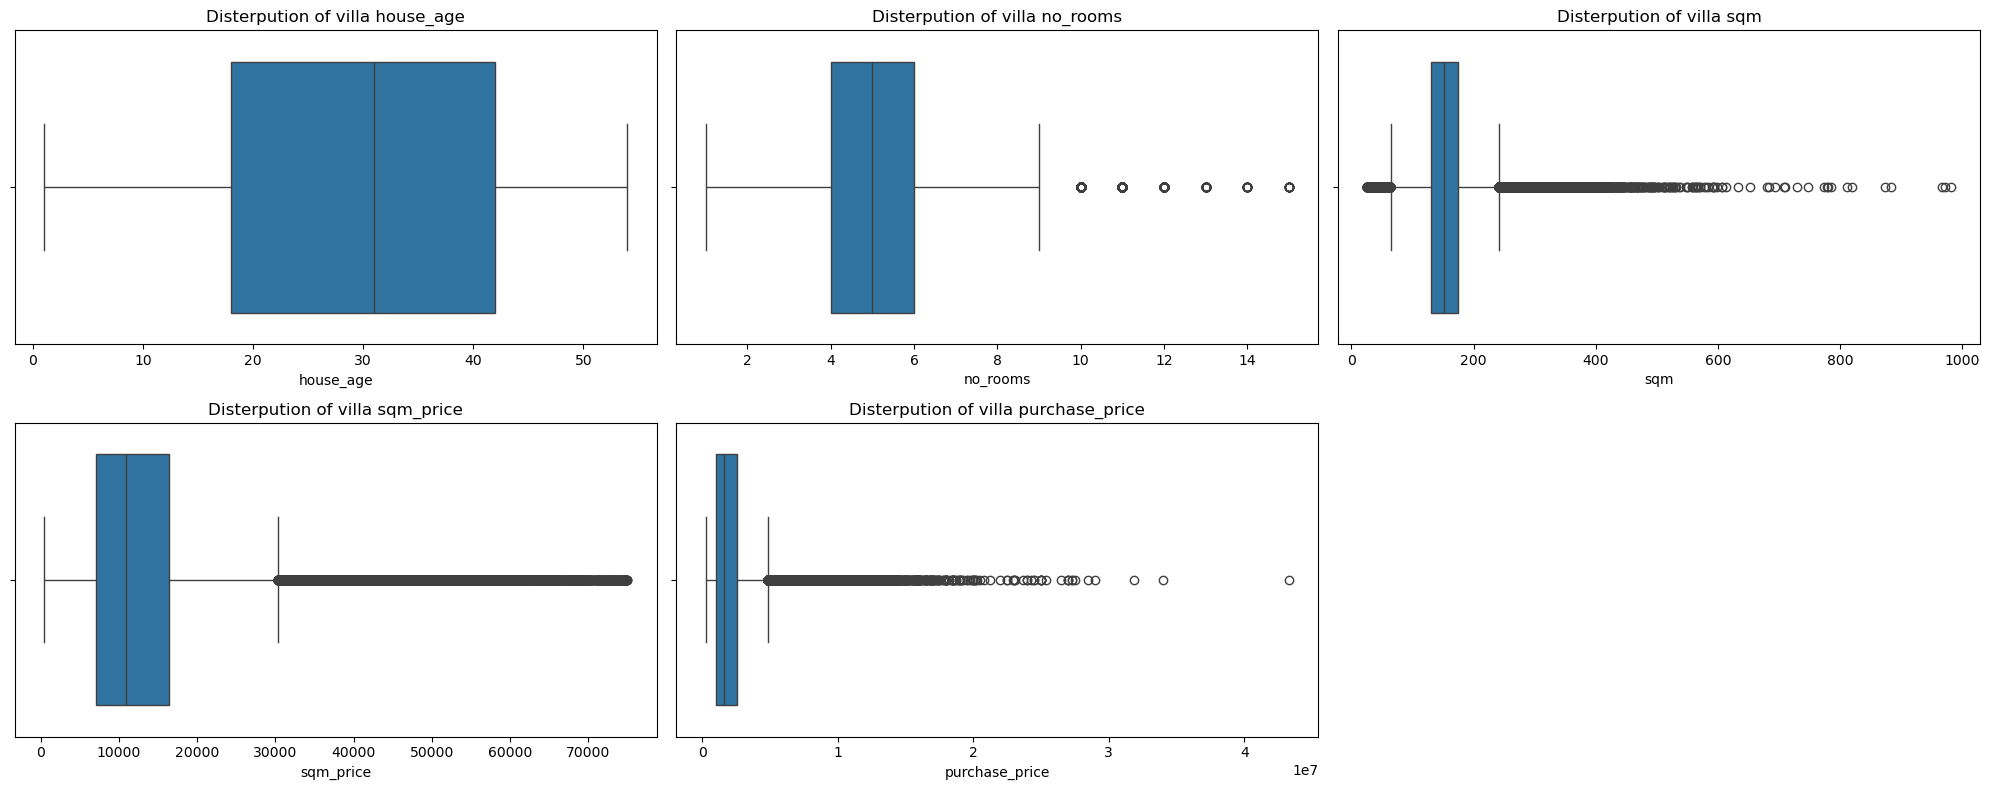

In [40]:
#Numerical data outlyers shape:
plt.figure(figsize=(20,8))
for e ,i in enumerate(villa_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of villa {i}")
    sns.boxplot(x=villa_df[i])
    plt.tight_layout();

<h2 style="text-align: center;"><strong>correlation coefficient between Villas feature data columns</strong></h2>

In [41]:
corr_villa = villa_df[["house_age","no_rooms","sqm","sqm_price","purchase_price"]]

In [42]:
# sns.pairplot(corr_villa , kind="reg");

<Axes: >

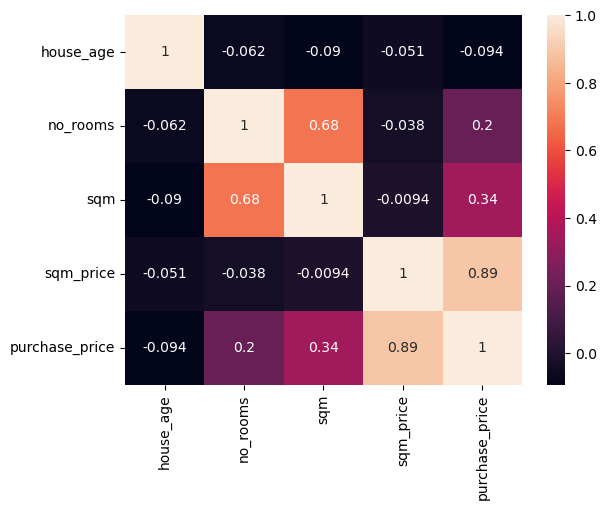

In [43]:
sns.heatmap(corr_villa.corr() , annot=True )

<h2 style="text-align: center;">There is a strong positive correlation between  sqm_price and purchase_price by (0.89)</h2>

<h3>&rarr;So i will check <strong>"sqm price"</strong> for each <strong>"city &amp; region"</strong> to be able to determine which region and which city has high price for Villas sqm.</h3>

In [81]:
display(px.bar(villa_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm Avg price for Villas").update_layout(title_x=0.5))
display(px.bar(villa_df.groupby(["region"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index(), x="region", y="count", text_auto=True, title="Sold Villas Count per Rgion").update_layout(title_x=0.5))

In [91]:
display(px.bar(villa_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(30),text_auto=True,title="City sqm mean price for Villas").update_layout(title_x=(0.5)))
display(px.bar(villa_df.groupby(["city"])["sqm_price"].agg(["count","mean"]).sort_values(by="mean",ascending=False).reset_index().head(30), x="city", y="count", text_auto=True, title="Sold Villas count per Rgion").update_layout(title_x=0.5))

<h3 style="text-align: justify;">&rArr; Zealand region is ranking as the 1st region by high avrage of Villa sqm price by around 14.4K per meter followed by Fyn&amp;Island region by around 10.2K per meter.</h3>
<div>
<h3 style="text-align: justify;"> &rArr; Nordhaven city is ranking as the 1st city by high avrage of Villa sqm price by around 69K per meter followed by Aarhus city by around 52K per meter.</h3>
</div>

In [45]:
df["sqm_price"][df["city"] == "Hinnerup"].describe()

count     2461.000000
mean     14711.683983
std       8240.440568
min       1338.912109
25%       8021.390137
50%      14328.704102
75%      20621.468750
max      73214.289062
Name: sqm_price, dtype: float64

In [46]:
df["sqm_price"][df["region"] == "Zealand"].describe()


count    244312.000000
mean      19890.738138
std       13234.897549
min         327.291046
25%       10103.054932
50%       16956.521484
75%       26360.607422
max       75000.000000
Name: sqm_price, dtype: float64

In [47]:
display(px.box(df["sqm_price"][df["city"] == "Hinnerup"], x=df["sqm_price"][df["city"] == "Hinnerup"].values,title="Hinnerup City sqm price outlyers" ).update_layout(title_x=0.5))
display(px.box(df["sqm_price"][df["region"] == "Zealand"], x=df["sqm_price"][df["region"] == "Zealand"].values,title="Zealand Reagion sqm price outlyers").update_layout(title_x=0.5))

 <h1 style="text-align: center;"><strong>Apartments Data Disterpution</strong></h1> 

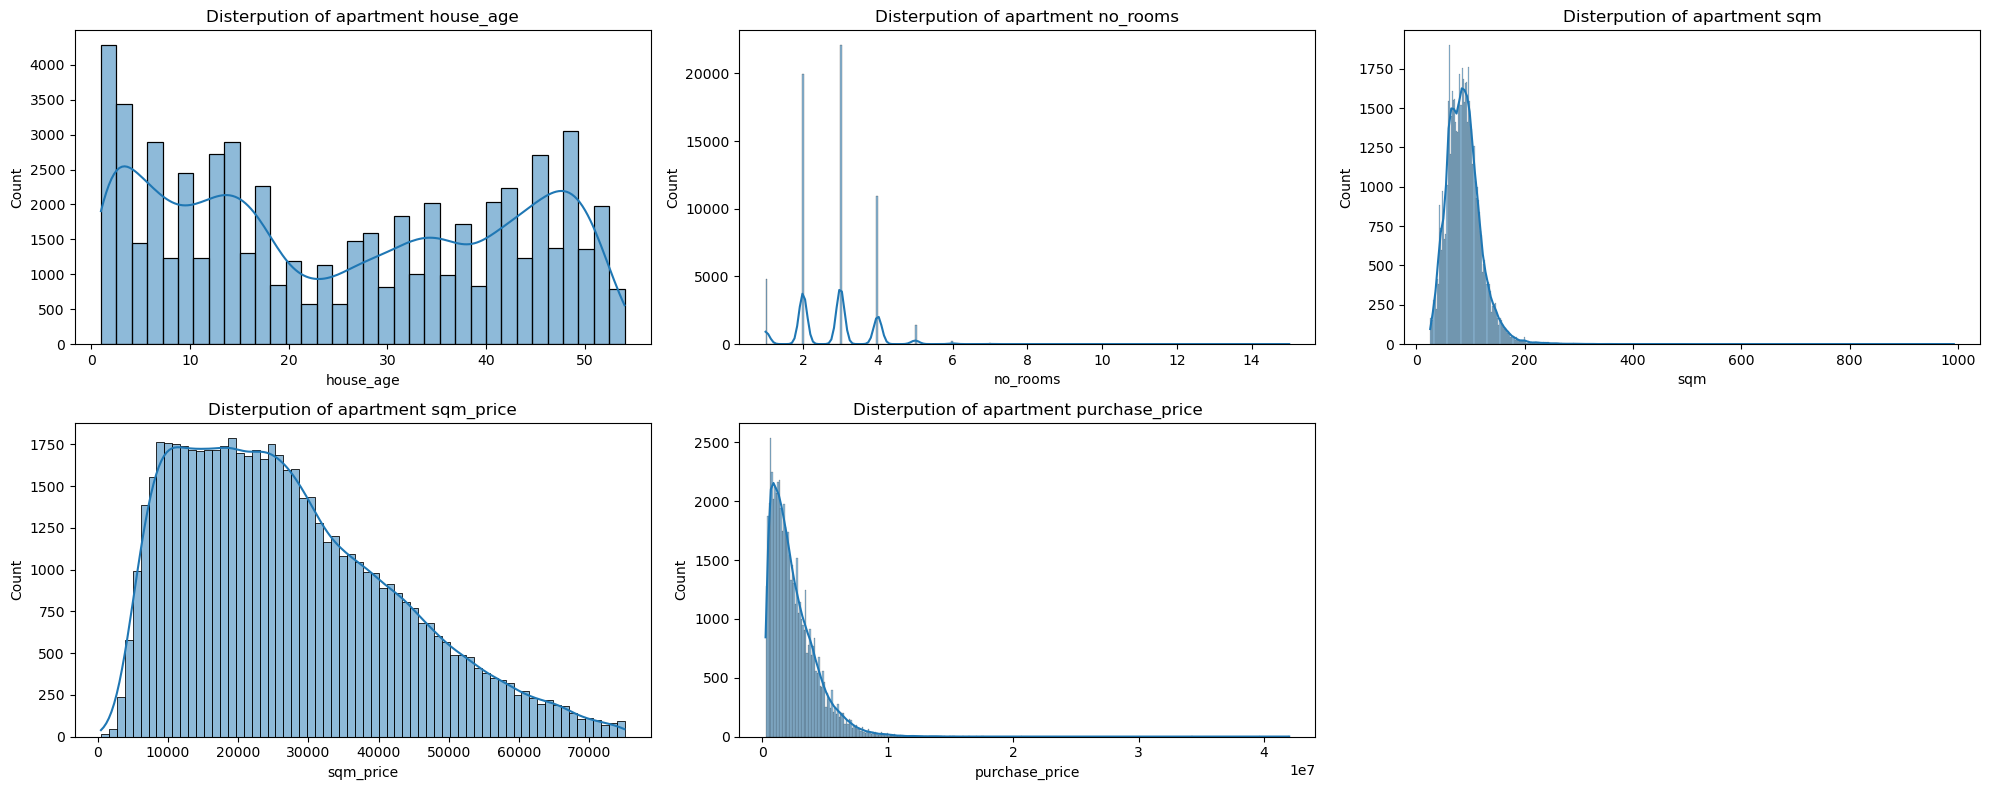

In [48]:
#Numerical data disterpution:
plt.figure(figsize=(20,8))
for e ,i in enumerate(apartment_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of apartment {i}")
    sns.histplot(apartment_df[i], kde=True)
    plt.tight_layout();

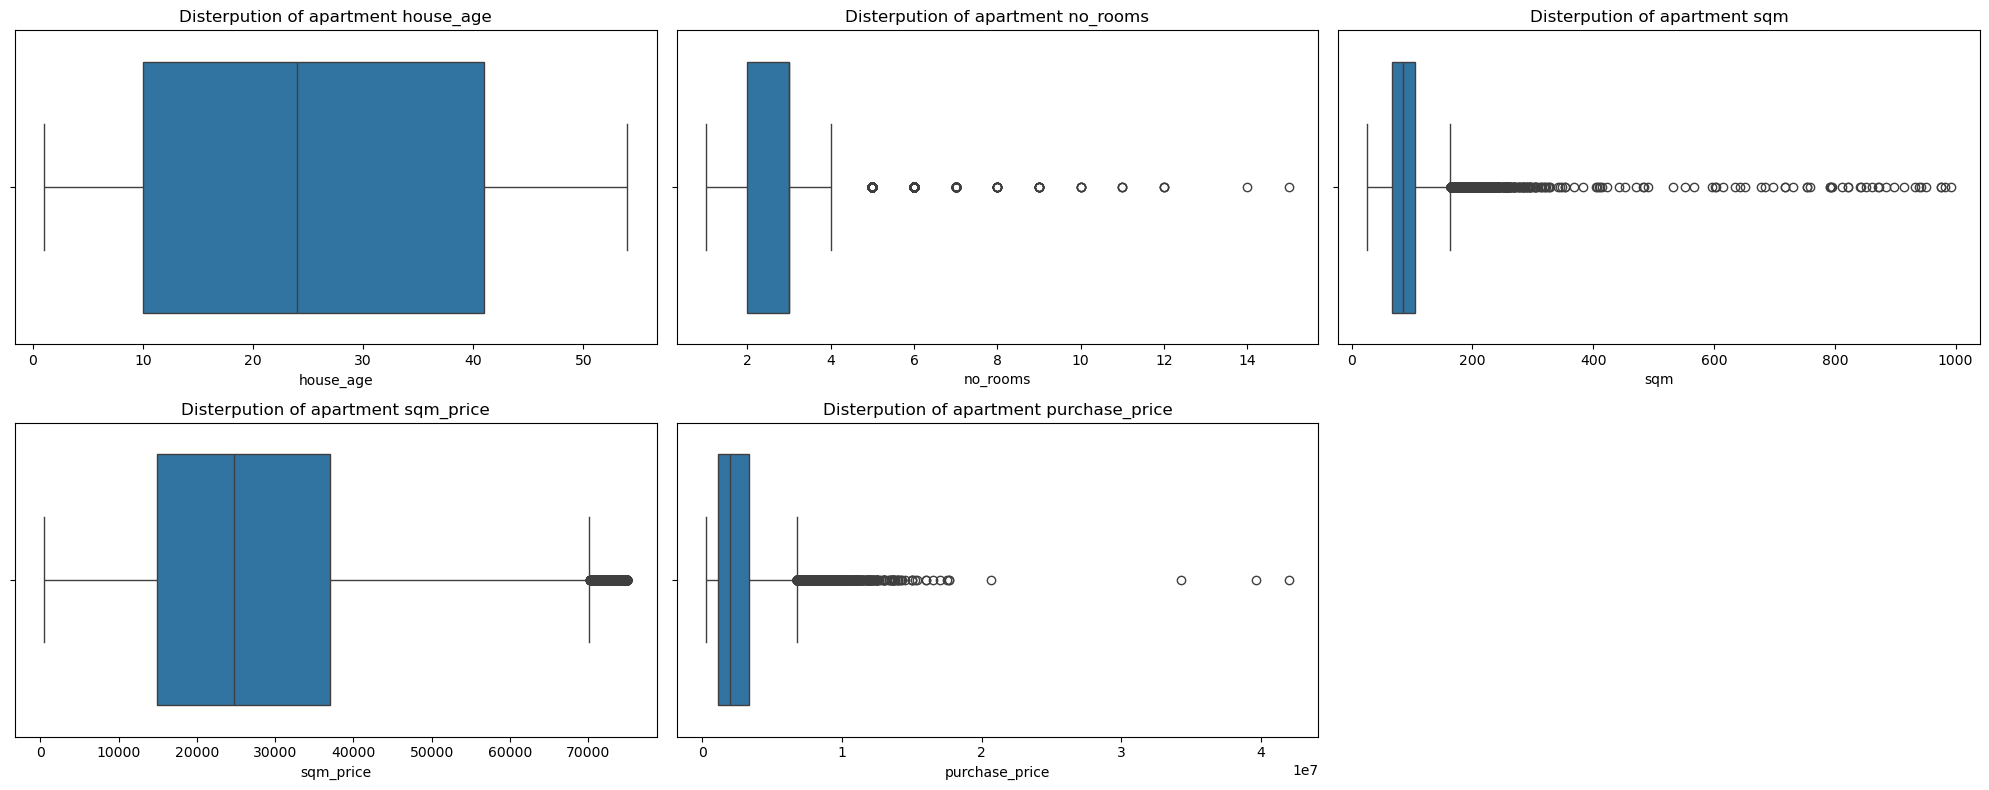

In [49]:
#Numerical data outlyers shape:
plt.figure(figsize=(20,8))
for e ,i in enumerate(apartment_df.columns[3:]) :
    plt.subplot(2,3,e+1)
    plt.title(f"Disterpution of apartment {i}")
    sns.boxplot(x=apartment_df[i])
    plt.tight_layout();

<h2 style="text-align: center;"><strong>correlation coefficient between Apartments feature data columns</strong></h2>

In [50]:
corr_apartment = apartment_df[["house_age","no_rooms","sqm","sqm_price","purchase_price"]]

In [51]:
# sns.pairplot(corr_apartment , kind="reg");

<Axes: >

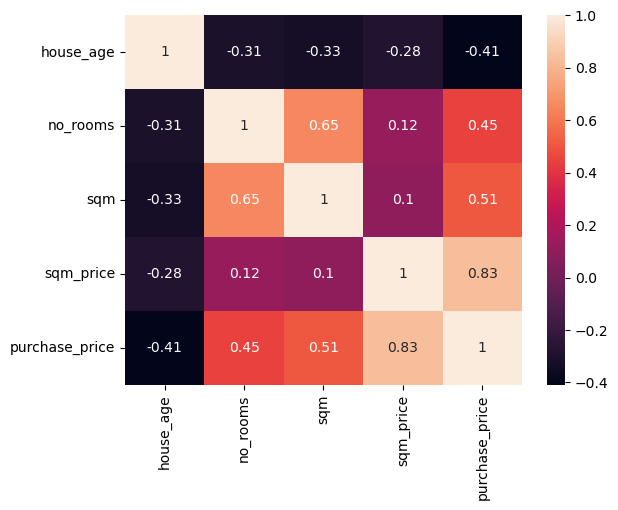

In [52]:
sns.heatmap(corr_apartment.corr() , annot=True)

<h2 style="text-align: center;">There is a strong positive correlation between apartment sqm_price and purchase_price by (0.83)</h2>

<h3>&rarr;So i will check <strong>"sqm price"</strong> for each <strong>"city &amp; region"</strong> to be able to determine which region and which city has high price for Apartments sqm.</h3>

In [64]:
display(px.bar(apartment_df.groupby(["region"])["sqm_price"].median().sort_values(ascending=False).round(2),text_auto=True,title="Region sqm mean price for Apartments").update_layout(title_x=0.5))
display(px.bar(apartment_df.groupby(["city"])["sqm_price"].mean().sort_values(ascending=False).round(2).head(20),text_auto=True,title="City sqm mean price for Apartments").update_layout(title_x=(0.5)))

# creat count bars for regions and city sales

In [54]:
# Houses Type Sales Disterpution
px.pie(names=house_types_pricing_factors["house_type"].value_counts().index, values=house_types_pricing_factors["house_type"].value_counts().values, title=("Houses Type Sales Disterpution")).update_layout(title_x=(0.5))

In [55]:
#City Sales Disterpution
px.bar(house_types_pricing_factors.groupby(["city"])["purchase_price"].sum().sort_values(ascending=False)).update_layout(title_x=(0.5))